In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import decomposition

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

random_state = np.random.RandomState(seed=42)

### Train data

In [5]:
first_n = 30_000

X_ = pd.read_csv('partial_dataset_train\\features.csv', index_col=0)
X = X_[:first_n]

y_ = pd.read_csv('partial_dataset_train\\labels.csv', index_col=0)
y = y_[:first_n]

del X_, y_

In [6]:
X.head()

,C0-1,C0-2,C0-3,C0-4,C0-5,C0-6,C0-7,C0-8,C0-9,C0-10,...,C8-91,C8-92,C8-93,C8-94,C8-95,C8-96,C8-97,C8-98,C8-99,C8-100
GCA_000474035.1_ASM47403v1.AGX32190.1,0.048,0.143,0.190,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.261,-0.408,-1.416,-2.440,1.106,-0.988,-2.093,0.879,0.848,0.490
GCA_000474035.1_ASM47403v1.AGX32191.1,0.079,0.068,0.052,0.082,0.019,0.060,0.025,0.014,0.030,0.088,...,46.974,5.258,-9.220,-38.018,33.755,-14.714,-28.453,9.052,15.603,18.250
GCA_000474035.1_ASM47403v1.AGX32192.1,0.119,0.087,0.052,0.100,0.052,0.074,0.032,0.013,0.026,0.042,...,32.604,5.340,2.275,-22.717,26.647,-8.617,-15.550,0.318,7.316,18.674
GCA_000474035.1_ASM47403v1.AGX32193.1,0.110,0.065,0.040,0.126,0.054,0.063,0.056,0.007,0.021,0.056,...,53.396,9.577,-0.556,-32.638,33.615,-18.208,-32.868,3.576,15.617,18.916
GCA_000474035.1_ASM47403v1.AGX32194.1,0.071,0.112,0.031,0.071,0.092,0.051,0.000,0.061,0.031,0.051,...,9.947,-0.399,6.355,-4.555,3.391,-3.494,-7.060,-0.879,4.413,-4.364


### Validation data

In [111]:
X_val = pd.read_csv("partial_dataset_valid\\features.csv", index_col=0)
y_val = pd.read_csv("partial_dataset_valid\\labels.csv", index_col=0)

>### Distribution of features 

<BarContainer object of 2 artists>

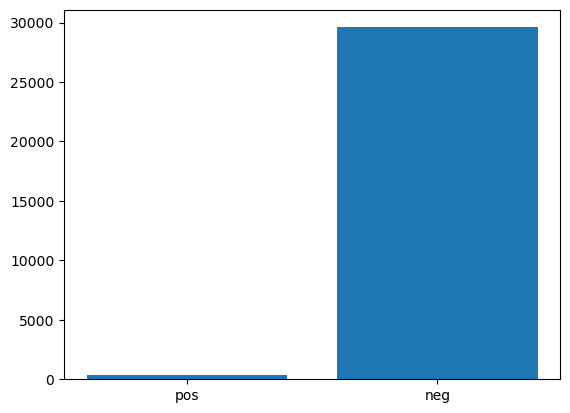

In [7]:
Labels = y["label"].values.flatten()
fig, ax = plt.subplots()
ax.bar(["pos", "neg"], [Labels.sum(), (~Labels).sum()])

>## Scaled & Unscaled data

In [ ]:
Power_Transformer = PowerTransformer()
X_train_s = Power_Transformer.fit_transform(X)

In [ ]:
y_=y.values.flatten()

In [ ]:
clf = linear_model.LogisticRegression(penalty="l2", max_iter=1500,class_weight="balanced",random_state=random_state)
clf_s = linear_model.LogisticRegression(penalty="l2", max_iter=1500,class_weight="balanced",random_state=random_state)

clf.fit(X, y_).score(X, y_)

In [ ]:
clf_s.fit(X_train_s, y_).score(X_train_s, y_)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(clf.coef_, clf_s.coef_)
plt.xlabel("Unscaled Data")
plt.ylabel("Scaled Data ")
plt.savefig("images/scatter.png")

>## Preprocessing 

In [72]:
# Select_k best

X_select = SelectKBest(k=10).fit_transform(X, y)
X_select 

C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  1.778,  -2.526,   0.37 , ...,  -1.117,  -1.178,   2.501],
       [ 38.792, -31.606,  24.462, ..., -20.403, -29.845,  32.04 ],
       [ 32.207, -24.882,   6.19 , ..., -26.325, -22.241,  28.407],
       ...,
       [ 16.746, -12.385,   1.409, ...,  -7.368,  -8.797,   8.769],
       [ 33.423, -29.203,   6.015, ..., -15.992, -16.769,  16.444],
       [ 56.593, -42.186,  17.249, ..., -21.343, -35.433,  40.96 ]])

>### Standard Scaler

In [116]:
# Scaling

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_select)
scaled_X.shape

(30000, 10)

In [117]:
pca_S = PCA(n_components=10)
pca_S.fit(scaled_X)

PCA(n_components=10)

In [118]:
# project X on principal components
X_projected_S = pca_S.transform(scaled_X)
pca_S.explained_variance_ratio_

array([0.84205998, 0.07503553, 0.03734979, 0.02069677, 0.00808125,
       0.00608606, 0.00378793, 0.00295243, 0.0020629 , 0.00188736])

>### Robust Scaler

In [76]:
#Robust scaling

robust_scaler = RobustScaler()
robust_scaled_X = robust_scaler.fit_transform(X_select)
robust_scaled_X

array([[-0.92757123,  0.89773253, -0.85432862, ...,  0.93879245,
         0.97930195, -0.89558079],
       [ 0.60021257, -0.48244521,  1.58580002, ..., -0.45324624,
        -0.81059565,  0.7210015 ],
       [ 0.32841119, -0.1633147 , -0.26485706, ..., -0.88068858,
        -0.33582043,  0.52217814],
       ...,
       [-0.30975451,  0.42981051, -0.74909478, ...,  0.48760331,
         0.50359016, -0.55255165],
       [ 0.37860261, -0.36839545, -0.28258172, ..., -0.13486593,
         0.00583791, -0.13252155],
       [ 1.33496373, -0.98458691,  0.85524017, ..., -0.52109423,
        -1.15949675,  1.20916678]])

In [77]:
pca_RS = PCA(n_components=10)
pca_RS.fit(robust_scaled_X)

PCA(n_components=10)

In [78]:
# project X on principal components
X_projected_RS = pca_RS.transform(robust_scaled_X)
pca_RS.explained_variance_ratio_

array([0.83292906, 0.07883915, 0.04361342, 0.0208611 , 0.00782624,
       0.00581517, 0.00350253, 0.00276283, 0.00199479, 0.00185571])

>### Power Transformer

In [79]:
# Scaling
Power_Transformer = PowerTransformer()
PT_scaled_X = Power_Transformer.fit_transform(X_select)

In [80]:
pca_PT = PCA(n_components=10)
pca_PT.fit(PT_scaled_X)

PCA(n_components=10)

In [81]:
X_projected_PT = pca_PT.transform(PT_scaled_X)
pca_PT.explained_variance_ratio_

array([0.80883276, 0.08181252, 0.04849254, 0.02836388, 0.01067356,
       0.00670227, 0.0045779 , 0.00442211, 0.00333175, 0.0027907 ])

In [121]:
df_s = pd.DataFrame(list(zip(y['label'],PT_scaled_X[:,0],PT_scaled_X[:,1])), columns =['label', 'X1','X2']) 

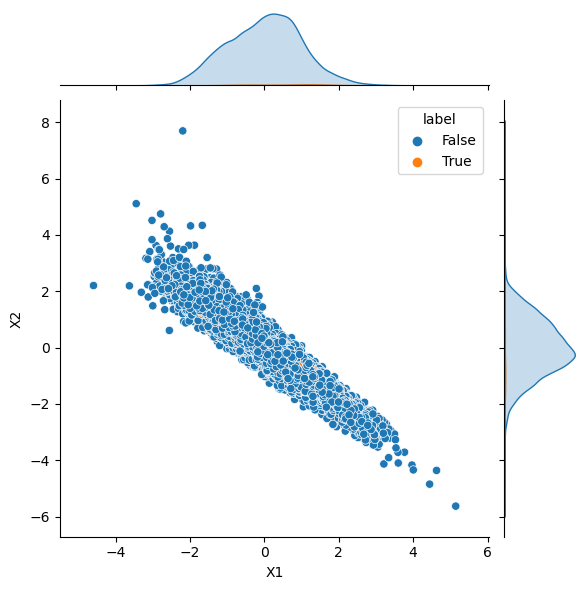

In [122]:
sns.jointplot(data=df_s, x='X1', y='X2', hue = 'label')

In [87]:
df = pd.DataFrame(list(zip(y['label'],PT_scaled_X[:,0],PT_scaled_X[:,1])), columns =['label', 'X1','X2']) 

Text(0, 0.5, 'X2')

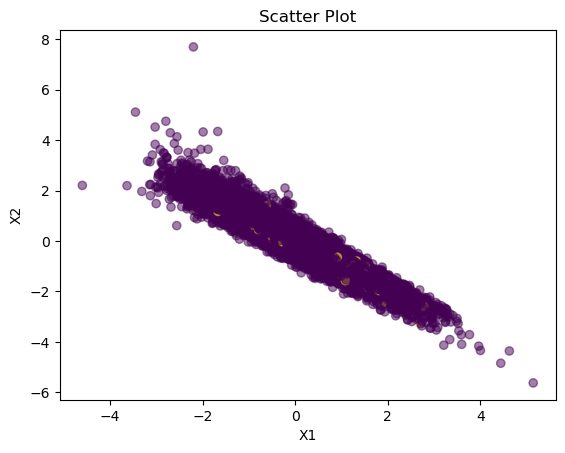

In [88]:
plt.scatter(df["X1"],df["X2"], c=df['label'], alpha = 0.5)
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('X1')
plt.ylabel('X2')

 

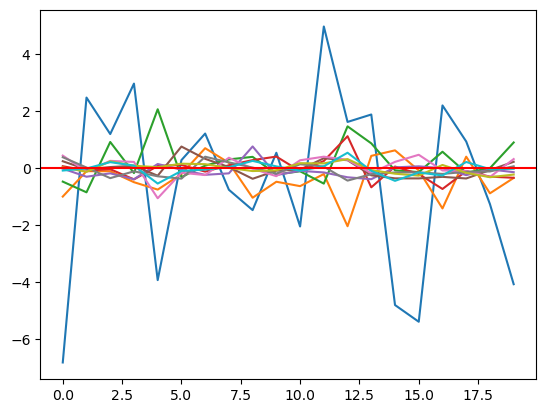

In [92]:
plt.plot(X_projected_PT[:20])
plt.axhline(color='red')

>### Correlation coefficient between original variables and the component

In [108]:
loadings = pca_PT.components_
num_pc = pca_PT.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
#loadings_df['variable'] = X.columns.values
#loadings_df = loadings_df.set_index('variable')
loadings_df
pca_top = loadings_df.sort_values(['PC1', 'PC2'], ascending=False).nlargest(10, ['PC1', 'PC2']).abs()

C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
pca_top

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.339731,0.088530,0.229708,0.060887,0.104661,0.291568,0.341021,0.298566,0.720148,0.016023
4,0.337926,0.116998,0.054731,0.219563,0.250094,0.695927,0.129301,0.399701,0.253943,0.181898
9,0.333616,0.159703,0.131577,0.190226,0.589104,0.492452,0.173971,0.050447,0.204886,0.381255
2,0.277394,0.000110,0.835644,0.339791,0.152215,0.096010,0.205807,0.081167,0.167109,0.006013
5,0.170659,0.955768,0.113885,0.186571,0.088794,0.008197,0.026853,0.027856,0.001478,0.012423
3,0.299740,0.128845,0.309269,0.852808,0.249716,0.046624,0.004091,0.074297,0.015382,0.017938
6,0.337868,0.034277,0.268483,0.036125,0.310902,0.183177,0.509508,0.504514,0.069840,0.402565
7,0.339714,0.089912,0.203472,0.005267,0.003376,0.374239,0.417130,0.691362,0.177138,0.107971
1,0.340875,0.009152,0.063839,0.084064,0.619970,0.013154,0.207362,0.056137,0.344858,0.568300
8,0.342662,0.116333,0.049489,0.161097,0.070777,0.054083,0.563055,0.000575,0.437693,0.569304


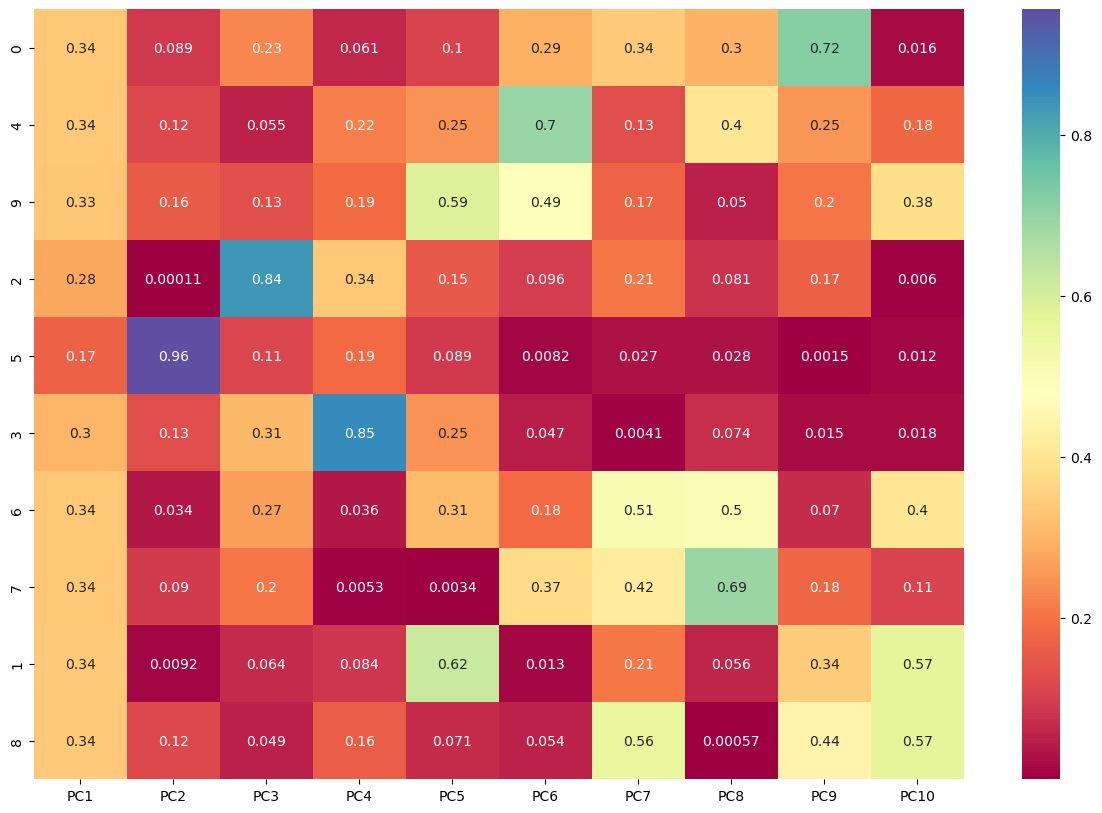

In [110]:
fig = plt.figure(figsize=(15, 10))
ax = sns.heatmap(pca_top, annot=True, cmap='Spectral')
plt.show()

>## Model selection and validation

In [119]:
# Select_k best

X_select_val = SelectKBest(k=10).fit_transform(X_val, y_val)

scaler = StandardScaler()
scaled_X_val = scaler.fit_transform(X_select_val)

pca_S = PCA(n_components=10)
pca_S.fit(scaled_X_val)

# project X on principal components
X_projected_val = pca_S.transform(scaled_X_val)

C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [120]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    
    # training model
    pipe.fit(X_projected_S, y)   
    print(classifier)
    
    acc_score = pipe.score(X_projected_val, y_val)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = pipe.predict(X_projected_S)
    
#    target_names = [le_name_mapping[x] for x in le_name_mapping]
#    print(classification_report(y_test, y_pred, target_names=target_names))
    
    if acc_score > 0.8:
        top_class.append(classifier)

C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()
model score: 0.999


C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.025, probability=True)
model score: 1.000
DecisionTreeClassifier()
model score: 0.981


C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RandomForestClassifier()
model score: 1.000


C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()
model score: 0.998


C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()
model score: 0.997
SGDClassifier()
model score: 1.000


C:\Users\meryame.boudhar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
